# Lexicons

Frequency lists can show us the words that occur in a text, but they don't necessary offer insights on the broader topics that are discussed. If we want to uncover the semantics of texts, we can make use of word lists which map the text’s tokens to pre-defined semantic categories. We can make a list of words which all have to do with 'religion', for instance. Next, by counting the numbers of times the text uses one of the tokens on the word, we can form an impression of the importance of this particualr topic within out text.  

Examples of applications in which this principle is implemented include
the [Harvard General Inquirer (HGI)](http://www.wjh.harvard.edu/~inquirer/homecat.htm), [the Linguistic Inquiry and Word Count (LIWC)
tool](http://liwc.wpengine.com/)  and the [UCREL Semantic Analysis System (USAS)](http://ucrel.lancs.ac.uk/usas/). The programmers responsible for the *Harvard General Inquirer*, for example, have defined 182 semantic categories, and they have compiled long list of words pertaining to these categories.  Such word lists are usually referred to as lexicons. 

To let you work with the possibilities of semantic tagging, a number of the lexicons that have been made available have been downloaded and merged. Next to the lexicons developed for the HGI and USAS, the word lists created for this course also include terms taken from lists compiled by [Bing Liu](https://www.cs.uic.edu/~liub/) and by the project team that worked on the [Multi-Perspective Question Answering (MPQA) tool](http://mpqa.cs.pitt.edu/). 

The merged semantic lexicons can be found here: 
https://github.com/peterverhaar/semanic-tagging/tree/main/Lexicons


In the code below, the lexicon files that are available are all mentioned in the list named `lexicon_files`. 

The code downloads all of these lexicon files. The terms that are mentioned in these files are saved in a list. Next, these lists are saved in a dictionary named `lexicons`. The keys of this dictionary are the names of the topics. These topic names are are derived from the file names that are given in `lexicon_files`.

In [1]:
import re
import requests

baseUrl = 'https://raw.githubusercontent.com/peterverhaar/semanic-tagging/main/Lexicons/'
lexicon_files = [  'Academic.txt' , 'Economics.txt' ,  'Legal.txt' , 'Military.txt' , 'Movement.txt' , 'Pain.txt' , 'Passive.txt' , 'Pleasure.txt' , 'Politics.txt' , 'Power.txt' , 'Religion.txt' , 'Space.txt' , 'Time.txt' , 'Transportation.txt' , 'Vice.txt' , 'Weather.txt' , 'workAndEmployment.txt' ]

lexicons = dict()


for l in lexicon_files:
    topic = l[ : l.rindex('.') ]
    response = requests.get( baseUrl + l)
    words = []
    if response:
        response.encoding = 'utf-8'
        lines = re.split( r'\n' , response.text )
        for l in lines: 
            if re.search( r'\w' , l ):
                words.append(l.strip())
    else:
        print('Cannot download lexicon file!')
    lexicons[topic] = words


You can use the code below to count the number of occurrences of the words in these various lexicons within the texts of your corpus. The code searches in lemmatised versions of all the corpus texts. 

The result (consisting of counts for all the texts in your corpus) is stored in a file named 'lexicon.csv'.

If your texts are long, or if the corpus contains many texts, running the code make take quite a while. 

In [ ]:
import tdm
import os
from os.path import join

dir = 'Corpus'


csv = open( 'lexicon.csv' , 'w' , encoding = 'utf-8' )

## print header
csv.write( 'title' )
for l in lexicons:
    csv.write( f',{l.lower().strip() }' )
csv.write('\n')

dir = 'Corpus'
for file in os.listdir( dir ):
    if re.search( r'\.txt$' , file ):
        csv.write( tdm.removeExtension( file ) )
        path = join( dir, file )
        
        print( '\nLemmatising {} ...'.format( file ) )
        novel = tdm.text(path)
        lemmatised = novel.lemmatise()
        
        print( 'Performing semantic tagging for {} ...'.format( file ) )
        
        words = tdm.word_tokenise(lemmatised)
        freq = dict()
        for w in words:
            freq[w] = freq.get(w,0)+1
        tokens = len(lemmatised)
        
        for l in lexicons:
            print(f'{l} ...')    
            
            countOccurrences = 0
            for word in l:
                countOccurrences += freq.get(word,0)
            
            csv.write( ',{}'.format( countOccurrences / tokens ) )
        csv.write('\n')
        
csv.close()

print("Done!")



In the cell below, the counts that have made for the terms from the various lexicons can be visualised as a bar chart. As the value of the variable named `y`, you need to type in the name of the lexicon, without the .txt extension. 

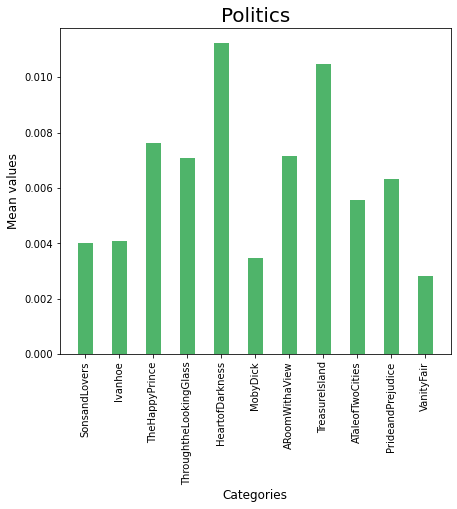

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('lexicon.csv')

fig = plt.figure( figsize=( 7 ,6 ) )
ax = plt.axes()

x = 'title'
y = 'politics'


bar_width = 0.45
opacity = 0.8

ax.bar( df[x] , df[y] , width = bar_width, alpha = opacity , color = '#23a145')

plt.xticks(rotation= 90)

ax.set_xlabel('Categories' , fontsize= 12)
ax.set_ylabel('Mean values' , fontsize = 12 )
ax.set_title( y.title() , fontsize=20 )


plt.show()

The code below, finally, creates a bar chart which visualises the counts for three lexicons simultaneously. The counts to be shown need to be specified in the list named `lexiconsInChart`. This bar chart enables you to compare the values collected for the three semantic domains you have listed. 

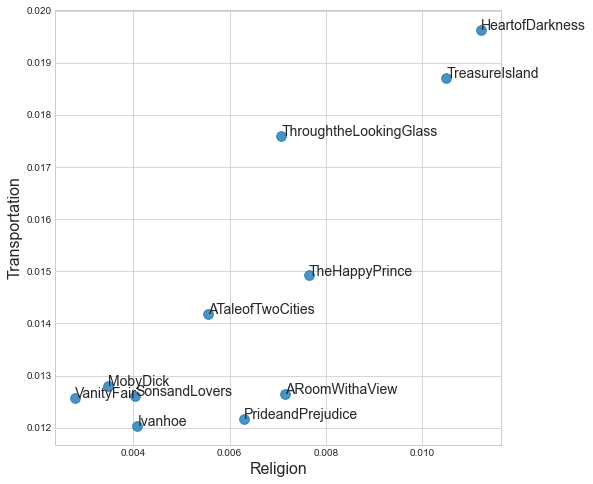

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

data = pd.read_csv( 'lexicon.csv' )


x_axis = 'religion' 
y_axis = 'transportation' 


plt.style.use('seaborn-whitegrid')


fig = plt.figure( figsize = ( 8,8 ))
ax = plt.axes()


ax.scatter( list(data[x_axis])  , list(data[y_axis]) , alpha=0.8,  s=95 )


for index, row in data.iterrows():
    plt.text( row[x_axis] , row[y_axis] , row['title'] , fontsize=14)
    

ax.set_xlabel( x_axis.title() , fontsize = 16 )
ax.set_ylabel( y_axis.title()  , fontsize = 16 )

plt.show()